<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-общей-информации." data-toc-modified-id="Получение-общей-информации.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение общей информации.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Расчеты-и-добавление-данных-в-таблицу" data-toc-modified-id="Расчеты-и-добавление-данных-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчеты и добавление данных в таблицу</a></span></li><li><span><a href="#Изучение-и-описание-параметров" data-toc-modified-id="Изучение-и-описание-параметров-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение и описание параметров</a></span></li><li><span><a href="#Как-быстро-продавались-квартиры" data-toc-modified-id="Как-быстро-продавались-квартиры-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Как быстро продавались квартиры</a></span></li><li><span><a href="#Какие-факторы-влияют-на-цену" data-toc-modified-id="Какие-факторы-влияют-на-цену-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Какие факторы влияют на цену</a></span></li><li><span><a href="#Средняя-цена-в-10-населенных-пунктах" data-toc-modified-id="Средняя-цена-в-10-населенных-пунктах-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Средняя цена в 10 населенных пунктах</a></span></li><li><span><a href="#Цена-и-расстояние-до-центра" data-toc-modified-id="Цена-и-расстояние-до-центра-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Цена и расстояние до центра</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Конечная цель моего исследования: узнать, какие параметры квартиры влияют на ее конечную цену

Таким образом, исследование пройдёт в три этапа:

Обзор данных.

Предобработка данных.

Расчет дополнительных параметров, необходимых для исследования

• цены квадратного метра;

• день недели, месяц и год публикации объявления;

• этаж квартиры: варианты — первый, последний, другой;

Исследовательский анализ данных. Зависимость цены квартиры :

• от площади, числа комнат, удалённости от центра

• от того, каком этаже расположена квартира: первом, последнем или другом.

• от даты размещения: дня недели, месяца и года.

### Получение общей информации. 

Открываю файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Общая информация

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


При первичном осмотре видно:

в формат int из формата float:

- last_price
- floors_total
- balcony
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- airports_nearest
- cityCenters_nearest
- days_exposition

в формат bool из формата object:

- is_apartment

в формат даты

- first_day_exposition object

в названии колонок 'parks_around3000, 'ponds_around3000', 'cityCenters_nearest' присутствует нарушение стиля:

не соблюден snake case,
присутствуют прописные буквы.

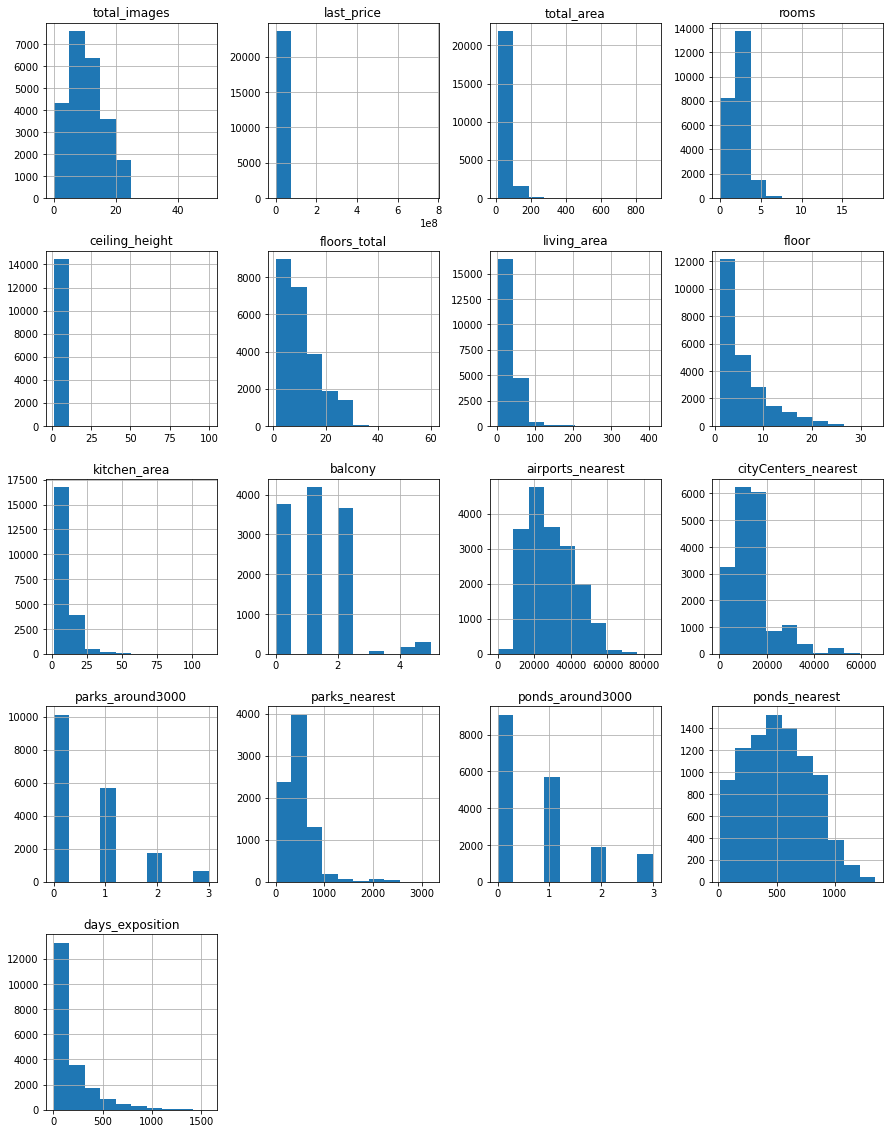

In [4]:
data.hist(figsize=(15, 20));

В каждой строке таблицы — данные о конкретной квартире, выставленной на продажу. По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но данные, скорее всего, взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников исполнителем.

Для корректного анализа попытаемся устранить выявленные ошибки, для чего проведем более подробную проверку каждого столбца в следующем разделе.

### Предобработка данных

In [5]:
#переименование колонок (исправление стиля)
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)

#проверяем внесение изменений:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Для наглядности создаю словарь словарь с наименованием и описанием столбцов датафрейма и функцию с вызовом основных характеристик столбца:

In [6]:
# словарь с описанием столбцов
dict_data ={
    'airports_nearest':'расстояние до ближайшего аэропорта в метрах (м)',
    'balcony': 'число балконов',
    'ceiling_height': 'высота потолков (м)',
    'city_centers_nearest': 'расстояние до центра города (м)',
    'days_exposition': 'сколько дней было размещено объявление (от публикации до снятия)',
    'first_day_exposition': 'дата публикации',
    'floor': 'этаж',
    'floors_total': 'всего этажей в доме',
    'is_apartment': 'апартаменты (булев тип)',
    'kitchen_area': 'площадь кухни в квадратных метрах (м²)',
    'last_price': 'цена на момент снятия с публикации',
    'living_area': 'жилая площадь в квадратных метрах (м²)',
    'locality_name': 'название населённого пункта',
    'parks_around_3000':'число парков в радиусе 3 км',
    'parks_nearest': 'расстояние до ближайшего парка (м)',
    'ponds_around_3000': 'число водоёмов в радиусе 3 км',
    'ponds_nearest': 'расстояние до ближайшего водоёма (м)',
    'rooms': 'число комнат',
    'studio': 'квартира-студия (булев тип)',
    'total_area': 'площадь квартиры в квадратных метрах (м²)',
    'total_images': 'число фотографий квартиры в объявлении'
}

#словарь со значениями 
dict_name = pd.Series(dict_data)

In [7]:
#просмотр данных столбца: уникальные значения, тип данных, кол-во пропусков
def cheking(column):
    print(column, '-', dict_name[column])
    print('тип данных', data[column].dtypes)
    print('количество пропусков',data[column].isna().sum())
    if data[column].dtypes != 'object':
        print('минимальное значение:',data[column].min(), 'максимальное значение:', data[column].max() )
    print('уникальные значения:', '\n', data[column].value_counts())

Так же для удобства, прописываю еще 1 функцию, которая заполняет:
- медианой, сгруппированной по другому столбцу

In [8]:
# Функция для заполнения пропусков столбца датафрейма медианой, сгруппированной по столбцу: 
#col_na -столбец с пропусками, col_group - столбец для группировки.
def filling_median_group (col_na, col_group):
    print('1.пропуски до изменений: ', data[col_na].isna().sum())
    for value in data[col_group].unique():
        median_col_group = data.loc[data[col_group]==value, col_na].median()
        data.loc[(data[col_na].isna()) & (data[col_group]==value), col_na] = median_col_group
    print('2.пропуски после изменений: ', data[col_na].isna().sum())

Столбец **Last_price**

In [9]:
cheking('last_price') 
# Проверим на цену менее 500000
data.loc[(data['last_price']<1000000) & (data['locality_name']=='Санкт-Петербург' )]

last_price - цена на момент снятия с публикации
тип данных float64
количество пропусков 0
минимальное значение: 12190.0 максимальное значение: 763000000.0
уникальные значения: 
 4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Поменяю это значение вручную

In [10]:
data.loc[8793, 'last_price'] = 12190000
data.loc[(data['last_price']<1000000)& (data['locality_name']=='Санкт-Петербург' )]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Вывод: данное значение могло быть в тыс. рублей

Столбец **total_area**

In [11]:
cheking('total_area')
data['total_area'].describe()

total_area - площадь квартиры в квадратных метрах (м²)
тип данных float64
количество пропусков 0
минимальное значение: 12.0 максимальное значение: 900.0
уникальные значения: 
 45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Вывод: в данном столбце все хорошо

Столбец **first_day_exposition**

In [12]:
cheking('first_day_exposition')

first_day_exposition - дата публикации
тип данных object
количество пропусков 0
уникальные значения: 
 2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-09-04T00:00:00      1
2015-07-19T00:00:00      1
2017-01-28T00:00:00      1
2015-07-26T00:00:00      1
2014-12-17T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64


In [13]:
# Перевожу в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Вывод: данные переведены в формат datetime64

Столбец **studio**

In [14]:
cheking('studio') 
(data['studio']).describe()

studio - квартира-студия (булев тип)
тип данных bool
количество пропусков 0
минимальное значение: False максимальное значение: True
уникальные значения: 
 False    23550
True       149
Name: studio, dtype: int64


count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

Вывод: Не выявлено проблем, связанных со значениями столбца

Столбец **rooms**

In [15]:
cheking('rooms')

rooms - число комнат
тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 19
уникальные значения: 
 1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Проверю данные со значением 0

In [16]:
data.query('rooms == 0 and studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Все они- либо с признаком квартиры-студии, либо со свободной планировкой.
Тем не менее, для единообразия проверим количество комнат во всех студиях

In [17]:
# выборка объектов с признаком "студия"
#их количество:
print(len(data.query('studio == True')))

#уникальные значения кол-ва комнат:
data.query('studio == True')['rooms'] .value_counts()

149


0    138
1     11
Name: rooms, dtype: int64

Для единообразия заменим 1 (11 значений) на 0:

In [18]:
#присваиваем значение '0' в ячейках со значением '1':
data.loc[(data['rooms'] == 1) & (data['studio']==True),'rooms'] = 0

#проверим внесение изменений
data.query('studio == True')['rooms'] .value_counts()

0    149
Name: rooms, dtype: int64

Вывод: в целом проблем не выявлено, но я заменил 11 значений

Проверка значений столбца **ceiling_height**

In [19]:
cheking('ceiling_height') #  заполнить пустые поля, изменить высоту потолка здесь
(data['ceiling_height']).describe()

ceiling_height - высота потолков (м)
тип данных float64
количество пропусков 9195
минимальное значение: 1.0 максимальное значение: 100.0
уникальные значения: 
 2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заполним пропуски медианой, сгруппированной по количеству комнат:

In [20]:
#заполняем значения ceiling_height , равные Nan,
#на медиану, рассчитанную по каждой группировке rooms

filling_median_group('ceiling_height', 'rooms')

1.пропуски до изменений:  9195
2.пропуски после изменений:  1


In [21]:
data.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


Заменю это значние вручную на основе 16 комнат

In [22]:
#заполнение значения высоты потолка строки 14498 медианой:
data.loc[14498, 'ceiling_height'] = data.loc[data['rooms']==16, 'ceiling_height'].median()
print('Пропуски после внесения изменений:', data['ceiling_height'].isna().sum())

Пропуски после внесения изменений: 0


Вывод: Пропуски в столбце ceiling_height заполнены пустые значения из расчета медиан в каждой группе объектов, поделенных на число комнат. Причина пропусков- скорее всего незаполнение полей пользователями.

Столбец **floors_total**

In [23]:
cheking('floors_total')

floors_total - всего этажей в доме
тип данных float64
количество пропусков 86
минимальное значение: 1.0 максимальное значение: 60.0
уникальные значения: 
 5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64


Значени не много, можно удалить. Так как нет возможности их узнать

In [24]:
print('Пропуски до внеcения изменений:', data['floors_total'].isna().sum() )
data = data.dropna( subset=['floors_total'])
print('Пропуски после внесения изменений:', data['floors_total'].isna().sum() )

Пропуски до внеcения изменений: 86
Пропуски после внесения изменений: 0


Вывод: Пропуски были удалены

Столбец **living_area**

In [25]:
cheking('living_area') 
(data['living_area']).describe()

living_area - жилая площадь в квадратных метрах (м²)
тип данных float64
количество пропусков 1870
минимальное значение: 2.0 максимальное значение: 409.7
уникальные значения: 
 18.00    882
17.00    674
30.00    598
16.00    484
20.00    481
        ... 
50.26      1
43.81      1
54.43      1
86.10      1
16.74      1
Name: living_area, Length: 1769, dtype: int64


count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Необходимо заполнить пропуски значений. Используем для заполнения столбец rooms, по группировке уникальных значений которого рассчитаем медиану living_area.

In [26]:
# заполняем значения living_area , равные Nan,
#на медиану, рассчитанную по каждой группировке rooms
filling_median_group('living_area', 'rooms')

1.пропуски до изменений:  1870
2.пропуски после изменений:  0


Необходимо проверить общуюю и жилую площадь

In [27]:
print('количество логических ошибок:', data.query('living_area > total_area')['living_area'].count())

количество логических ошибок: 29


Заменяю в выявленных столбцах значение жилой площади на значение общей:

In [28]:
#замена значений living_area на total_area методом loc
data.loc[data['living_area'] > data['total_area'], 'living_area'] = data.loc[data['living_area'] > 
                                                              data['total_area'], 'total_area']

#проверка внесения изменений:
print('количество логических ошибок после внесения изменений:', data.query('living_area > total_area')['living_area'].count())

количество логических ошибок после внесения изменений: 0


Вывод: Пропуски столбца living_area заполнены медианными значениями, сгруппированными по количеству комнат

Столбец **is_apartment**

In [29]:
cheking('is_apartment') 
(data['is_apartment']).describe()

is_apartment - апартаменты (булев тип)
тип данных object
количество пропусков 20838
уникальные значения: 
 False    2725
True       50
Name: is_apartment, dtype: int64


count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

Заменю пропуски на False

In [30]:
print('Пропусков до замены', data['is_apartment'].isna().sum())
data['is_apartment'] = data['is_apartment'].fillna('False')
print('Пропусков после замены', data['is_apartment'].isna().sum())

Пропусков до замены 20838
Пропусков после замены 0


Вывод: пустые значения столбца 'is_apartment' заполнены значением 'False'

Столбец **kitchen_area**

In [31]:
cheking('kitchen_area') 
(data['kitchen_area']).describe()

kitchen_area - площадь кухни в квадратных метрах (м²)
тип данных float64
количество пропусков 2231
минимальное значение: 1.3 максимальное значение: 112.0
уникальные значения: 
 6.00     1300
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 966, dtype: int64


count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Заполним пустые значения также группировкой по rooms

In [32]:
filling_median_group('kitchen_area', 'rooms')

1.пропуски до изменений:  2231
2.пропуски после изменений:  205


Оставшиеся пропуски, это студии и свободные планировки

In [33]:
print('свободная планировка', data.query('kitchen_area.isna()')['open_plan'].value_counts())
print('студия', data.query('kitchen_area.isna()')['studio'].value_counts())

свободная планировка False    146
True      59
Name: open_plan, dtype: int64
студия True     146
False     59
Name: studio, dtype: int64


Заполню эти пропуски общей медианой

In [34]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
print('Количество пропусков:', data['kitchen_area'].isna().sum())

Количество пропусков: 0


Вывод: Пропуски столбца kitchen_area заполнены медианными значениями, сгруппированными по количеству комнат (столбец rooms)

Столбец **balcony**

In [35]:
cheking('balcony') 
(data['balcony']).describe()

balcony - число балконов
тип данных float64
количество пропусков 11480
минимальное значение: 0.0 максимальное значение: 5.0
уникальные значения: 
 1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


count    12133.000000
mean         1.154208
std          1.071022
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Пустые значения заполню 0

In [36]:
print('Пропусков до замены', data['balcony'].isna().sum())
data['balcony'] = data['balcony'].fillna(0)
print('Пропусков после замены', data['balcony'].isna().sum())

Пропусков до замены 11480
Пропусков после замены 0


Столбец **locality_name**

In [37]:
cheking('locality_name') 
data['locality_name'].describe()

locality_name - название населённого пункта
тип данных object
количество пропусков 48
уникальные значения: 
 Санкт-Петербург                        15651
посёлок Мурино                           520
посёлок Шушары                           439
Всеволожск                               398
Пушкин                                   369
                                       ...  
деревня Нижняя                             1
коттеджный поселок Счастье                 1
поселок городского типа Кондратьево        1
деревня Тихковицы                          1
деревня Куровицы                           1
Name: locality_name, Length: 364, dtype: int64


count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

Удаляю пустые значения

In [38]:
print('Пропусков до замены', data['locality_name'].isna().sum())
data = data.dropna(subset=['locality_name'])
print('Пропусков после замены', data['locality_name'].isna().sum())

Пропусков до замены 48
Пропусков после замены 0


In [39]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Есть неявные дубликаты, поэтому решаю избавиться от типа населенного пункта

In [40]:
#поиск в строковых переменных текстового фрагмента и его замена
print('количество уникальных значений до категоризации:', len(data['locality_name'].unique()))

#словарь для удаления значений
replace_dict = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']

#функция , удаляющая значения из replace_dict в столбце locality_name:
for value in replace_dict:
    data['locality_name'] = data['locality_name'].str.replace(value, '')

количество уникальных значений до категоризации: 364


In [41]:
# Результат выполнения
sorted(data['locality_name'].unique())

print('количество уникальных значений после категоризации:', len(data['locality_name'].unique()))

количество уникальных значений после категоризации: 305


В столбце locality_name выявлены строки, в которых не был указан населенный пункт (удалены), а также неявные дубликаты: в наименованиях населенных пунктов использовался разный стиль написания, что затруднило бы дальнейший анализ данных.

Причина пропусков и различного стиля написания населенных пунктов - либо в разных источниках данных, либо субъективный человеческий фактор при заполнении таблицы.

Столбец **airports_nearest**

In [42]:
cheking('airports_nearest') 
(data['airports_nearest']).describe()

airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
тип данных float64
количество пропусков 5524
минимальное значение: 0.0 максимальное значение: 84869.0
уникальные значения: 
 37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
42695.0     1
53478.0     1
20335.0     1
33699.0     1
20875.0     1
Name: airports_nearest, Length: 8251, dtype: int64


count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Заполняю пропуски медианой по всем значениям

In [43]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [44]:
# Результат
print('Количество пропущенных значений:', data['airports_nearest'].isna().sum())

Количество пропущенных значений: 0


Вывод: Пропуски столбца airports_nearest заполнены значениями по медиане, рассчитанной по всем значениям столбца airports_nearest.

Столбец **city_сenters_nearest**

In [45]:
cheking('city_centers_nearest') # заполнить пропуски 0 , int!
(data['city_centers_nearest']).describe()

city_centers_nearest - расстояние до центра города (м)
тип данных float64
количество пропусков 5501
минимальное значение: 181.0 максимальное значение: 65968.0
уникальные значения: 
 8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
8565.0      1
5278.0      1
11575.0     1
3205.0      1
4234.0      1
Name: city_centers_nearest, Length: 7623, dtype: int64


count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Заполню пропуски значений медианой, рассчитанной по каждой группе locality_name

In [46]:
filling_median_group('city_centers_nearest', 'locality_name')

1.пропуски до изменений:  5501
2.пропуски после изменений:  5432


Далее заполняю медианой по всем значениям

In [47]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

In [48]:
# Результат
print('Количество пропущенных значений:', data['city_centers_nearest'].isna().sum())

Количество пропущенных значений: 0


Вывод: Пропуски столбца city_centers_nearest частично заполнены медианными значениями, сгруппированными по столбцу locality_name, частично -по медиане, рассчитанной по всем значениям столбца city_centers_nearest Пропуски столбца airports_nearest заполнены значениями по медиане, рассчитанной по всем значениям столбца airports_nearest.

Столбец **parks_around_3000**

In [49]:
cheking('parks_around_3000') 
(data['parks_around_3000']).describe()

parks_around_3000 - число парков в радиусе 3 км
тип данных float64
количество пропусков 5500
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around_3000, dtype: int64


count    18065.000000
mean         0.611569
std          0.802088
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Пустые значения заполню 0

In [50]:
print('1.пропуски до изменений: ', data['parks_around_3000'].isna().sum())

data.loc[data['parks_around_3000'].isna(), 'parks_around_3000'] = 0

print('2.пропуски после изменений: ', data['parks_around_3000'].isna().sum()) 

1.пропуски до изменений:  5500
2.пропуски после изменений:  0


Пропуски значений столбца parks_around_3000 заполнены значением "0". Причина пропусков- скорее всего незаполнение поля клиентом ввиду отсутствия парков рядом с объектом недвижимости.

Столбец **parks_nearest**

In [51]:
cheking('parks_nearest') 
(data['parks_nearest']).describe()

parks_nearest - расстояние до ближайшего парка (м)
тип данных float64
количество пропусков 15535
минимальное значение: 1.0 максимальное значение: 3190.0
уникальные значения: 
 441.0     67
392.0     41
173.0     41
456.0     40
471.0     31
          ..
863.0      1
828.0      1
1909.0     1
1049.0     1
929.0      1
Name: parks_nearest, Length: 994, dtype: int64


count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Заполняю медианой по parks_around_3000

In [52]:
filling_median_group('parks_nearest', 'parks_around_3000')

1.пропуски до изменений:  15535
2.пропуски после изменений:  0


Вывод: Пропуски значений столбца parks_nearest заполнены медианой по группам значений столбца parks_around_3000. Причина пропусков- т.к. данный столбец заполняется автоматически, то отсутствие значения в столбце parks_around_3000 влечет за собой пропуски и здесь.

Столбец **ponds_around_3000**

In [53]:
cheking('ponds_around_3000') 
(data['ponds_around_3000']).describe()

ponds_around_3000 - число водоёмов в радиусе 3 км
тип данных float64
количество пропусков 5500
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around_3000, dtype: int64


count    18065.000000
mean         0.769499
std          0.938669
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

Заполню эти значения 0

In [54]:
print('1.пропуски до изменений: ', data['ponds_around_3000'].isna().sum())

data.loc[data['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0

print('2.пропуски после изменений: ', data['ponds_around_3000'].isna().sum()) 

1.пропуски до изменений:  5500
2.пропуски после изменений:  0


Пропуски значений столбца ponds_around_3000 заполнены значением "0". Пропуски из-за отсутсвия парков

Столбец **ponds_nearest**

In [55]:
cheking('ponds_nearest') 
(data['ponds_nearest']).describe()

ponds_nearest - расстояние до ближайшего водоёма (м)
тип данных float64
количество пропусков 14529
минимальное значение: 13.0 максимальное значение: 1344.0
уникальные значения: 
 427.0     69
454.0     41
153.0     40
433.0     39
564.0     37
          ..
105.0      1
59.0       1
1069.0     1
1270.0     1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64


count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [56]:
filling_median_group('ponds_nearest', 'parks_around_3000') 

1.пропуски до изменений:  14529
2.пропуски после изменений:  0


Вывод: Пропуски значений столбца ponds_nearest заполнены медианой по группам значений столбца parks_around_3000

Столбец **days_exposition**

In [57]:
cheking('days_exposition') 
(data['days_exposition']).describe()

days_exposition - сколько дней было размещено объявление (от публикации до снятия)
тип данных float64
количество пропусков 3171
минимальное значение: 1.0 максимальное значение: 1580.0
уникальные значения: 
 45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
969.0       1
1147.0      1
1.0         1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64


count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Выбераю строки, в которых отсутствует значение days_exposition и строю гистограмму

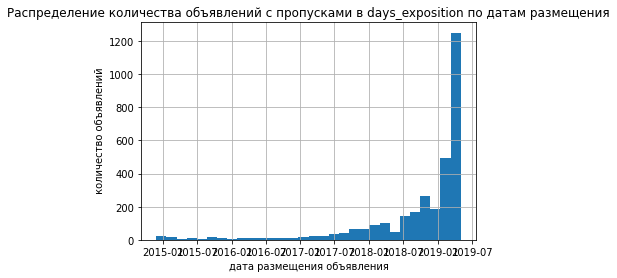

In [58]:
# выборка объявлений с пропусками в days_exposition:
day_na = data.query('days_exposition.isna()')

#гистограмма по дате размещения объявлений:
day_na['first_day_exposition'].hist(bins=30).set(xlabel='дата размещения объявления',
                              ylabel=' количество объявлений', 
                             title='Распределение количества объявлений с пропусками в days_exposition по датам размещения');

Из гистограммы видно, что чем больше дата, тем больше в базе данных объявлений с пропусками в days_exposition. Можно предположить, что эти объявления не были проданы. Поэтому заполню пропуски разницей между максимальной и first

In [59]:
print('1.пропуски до изменений: ', data['days_exposition'].isna().sum())

#максимальная дата
max_dt = data['first_day_exposition'].max()

#заполняем пропуски разностью first_day_exposition и max_dt:
data.loc[data['days_exposition'].isna(),
       'days_exposition'] = (max_dt - data.loc[data['days_exposition'].isna(),
       'first_day_exposition']).dt.days


print('2.пропуски после изменений: ', data['days_exposition'].isna().sum()) 

1.пропуски до изменений:  3171
2.пропуски после изменений:  0


Пропуски значений столбца days_exposition заполнены разностью между значением first_day_exposition и максимальной датой в днях поля first_day_exposition.

Причина пропусков- квартира не продана.

### Замена типа данных

In [60]:
#список наименований столбцов, в которых нужно изменить формат
data_format = ['last_price', 'floors_total', 'balcony', 
             'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 
            'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'days_exposition', 'airports_nearest']

#применяем метод astype() для изменения формата столбцов из df_format
data[data_format] = data[data_format].astype('int')

In [61]:
# меняем формат из object в bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [62]:
#проверка внесения изменений 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Вывод: изменил формат данных

In [63]:
data.duplicated().sum()

0

In [64]:
data.query('ceiling_height >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,8.7,2,Гатчина,26757,13073,0,3127,0,549,259
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,8.0,0,Волхов,26757,13073,0,3127,0,549,172
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,True,...,7.0,1,Санкт-Петербург,12016,13256,1,658,1,331,181
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,True,...,9.0,2,Мурино,26757,13073,0,3127,0,549,28
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,0,Санкт-Петербург,29686,8389,3,397,1,578,7
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,9.0,2,Мины,26757,13073,0,3127,0,549,540
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,7.0,2,Санкт-Петербург,28981,10912,1,305,0,498,267
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,True,...,12.0,5,Санкт-Петербург,18732,20444,0,3127,3,80,38
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,True,...,5.7,0,Кронштадт,68923,50649,1,417,2,73,39
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,True,...,5.2,0,Санкт-Петербург,11647,13581,0,3127,0,549,768


Количество значений явялется вбросами

In [65]:
data['ceiling_height'].isna().sum()

0

Проверка на пустые значения

In [66]:
list = []
for elem in data['ceiling_height']:
    if 0 <= elem < 2: # 1 условие
        list.append(None)
    elif 5 <= elem < 100: # условие
        list.append(elem/10)
    else: list.append(elem)
data['ceiling_height'] = list
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


- С помощью условий значения от 10 до 60 делятся на 10
- А начения от 0 до 2 заменяются медианой по столбцу

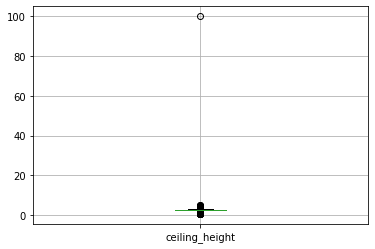

In [67]:
data.boxplot(['ceiling_height']);

В процессе предобработки данных пропуски значений были заполнены:

- медианой по группам значений либо общей медианой по всем значениям,
- False или 0
- пропуски значений столбца days_exposition заполнены разностью между значением first_day_exposition и максимальной датой в днях поля first_day_exposition (скорее всего объявления с пропусками имеют статус незакрытых)
- В случаях , когда заполнение невозможно, строки были удалены (отсутствие наименования населенного пункта в locality_name, количество этажей в доме , floors_total)

- Значения столбца locality_name категоризированы по наименованиям населенных пунктов (различные стили написания систематизированы и приведены в единообразию)

Возможные причины пропусков:
- Разные источники
- Сбой
- Некомпетентность заполняющего

### Расчеты и добавление данных в таблицу

Добавляю цену одного квадратного метра

In [68]:
data['square_meter'] = data['last_price'] / data['total_area']
data['square_meter'] = data['square_meter'].astype('int')

Добавляю день, месяц и год публикации

In [69]:
# Столбец с днем
data['weekday_publication'] = data['first_day_exposition'].dt.weekday
# Столбец с месяцем
data['month_publication'] = data['first_day_exposition'].dt.month
# Столбец с годом
data['year_publication'] = data['first_day_exposition'].dt.year

<div class="alert alert-info"><b>Комментарий студента:</b> <b>Спасибо, прочитал. В следующий раз буду пользоваться предложенным вариантом!</b>

с помощью функции поменяю цифры на наименование дня недели

In [70]:
def weekday(row):
    if row['weekday_publication'] == 1:
        return 'понедельник'
    elif row['weekday_publication'] == 2:
        return 'вторник'
    elif row['weekday_publication'] == 3:
        return 'среда'
    elif row['weekday_publication'] == 4:
        return 'четверг'
    elif row['weekday_publication'] == 5:
        return 'пятница'
    elif row['weekday_publication'] == 6:
        return 'суббота'
    elif row['weekday_publication'] == 7:
        return 'воскресенье'
data['weekday_publication'] = data.apply(weekday, axis=1) 

In [71]:
data['weekday_publication'].head()

0          среда
1    понедельник
2          среда
3        четверг
4    понедельник
Name: weekday_publication, dtype: object

In [72]:
#функция, определяющая категорию этажа:
def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применяем метод apply и функцию floors_category к созданному столбцу floor_group:
data['floor_group'] = data.apply(floors_category, axis=1)  

In [73]:
data['floor_group'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_group, dtype: object

In [74]:
# Делим значение в столбце на 1000 и округляем
data['center_distance_km'] = round(data['city_centers_nearest']/1000)
data['center_distance_km'] = data['center_distance_km'].astype('int')

Вывод: Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа, расстояние до центра в км.

### Изучение и описание параметров

Необходимо изучить параметры с помощью гистограм и сделать определенные выводы
1. Общая и жилая площадь

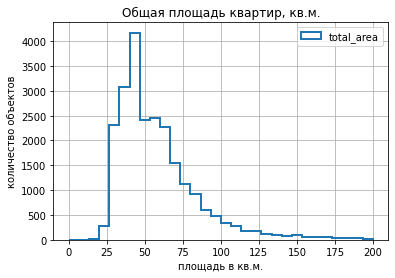

In [75]:
data['total_area'].plot(kind='hist', y='total_area', 
    histtype='step',bins=30, grid=True, legend=True, alpha=1,
    title='Общая площадь квартир, кв.м.',linewidth=2, range = (0, 200)
    ).set(xlabel='площадь в кв.м.', ylabel='количество объектов');

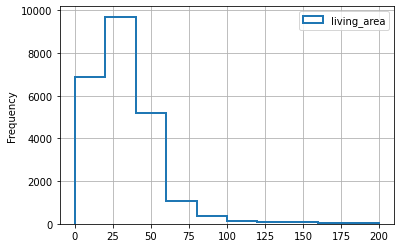

In [76]:
data['living_area'].plot(kind='hist', y='total_area', 
    histtype='step', bins=10, grid=True, legend=True, alpha=1,
    linewidth=2, range= (0, 200)                         
    );

- В общей площади пик находится от 30 до 40 кв. м. После 50 начинается снижние количества квартир
- В Жилой площади пик находится в начении 25 - 30 кв. метров. После 50 также начинается снижение количества квартир

2. Площадь кухни и цена объекта

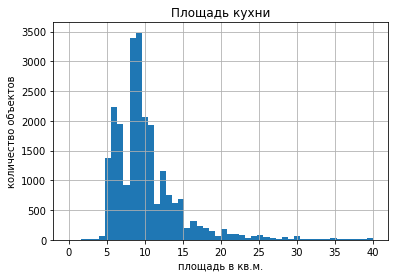

In [77]:
data['kitchen_area'].hist(bins=50, range=(0, 40)).set(title='Площадь кухни', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');
plt.show()

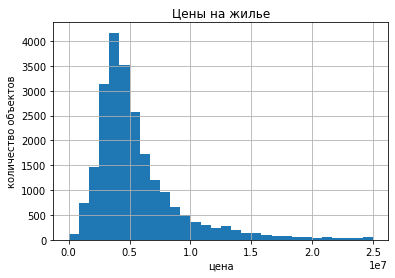

In [78]:
data['last_price'].hist(bins=30,  range=(0, 25000000)).set(title='Цены на жилье', 
    xlabel='цена', ylabel='количество объектов');

- диапазон площади кухни-в основном от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры, которые распространены в наших городах и являются типичными для среднестатистической квартиры эконом-класса
- Цены на квартиры в основном находятся в диапазоне 2.5-15 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса)

3. Количество комнат и высота потолков

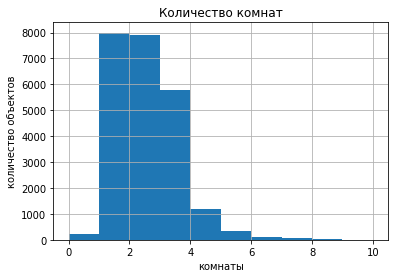

In [79]:
data['rooms'].hist(bins=10,  range=(0, 10)).set(title='Количество комнат', 
    xlabel='комнаты', ylabel='количество объектов');

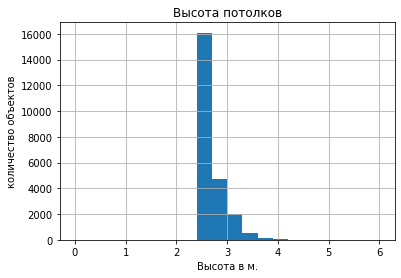

In [80]:
data['ceiling_height'].hist(bins = 20,  range=(0, 6)).set(title='Высота потолков', 
    xlabel='Высота в м.', ylabel='количество объектов');

- Пик комнат от 2 до 3
- Как и ожидалось потолки пик потолков 2,5 метра, дальше все меньше

4. Этаж и тип этажа

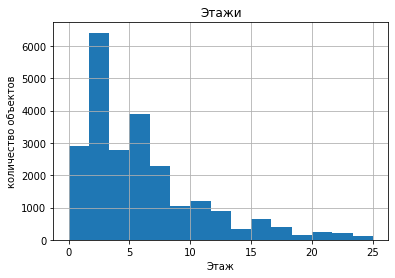

In [81]:
data['floor'].hist(bins = 15,  range=(0, 25)).set(title='Этажи', 
    xlabel='Этаж', ylabel='количество объектов');

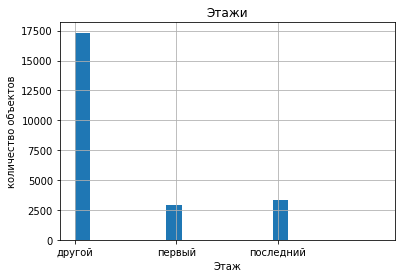

In [82]:
data['floor_group'].hist(bins = 20,  range=(0, 3)).set(title='Этажи', 
    xlabel='Этаж', ylabel='количество объектов');

- Больше всего квартир находится с 1 по 6 этаж
- Квартир которые находятся на последнем этаже, больше чем на первом

5. Общее количество этажей в доме

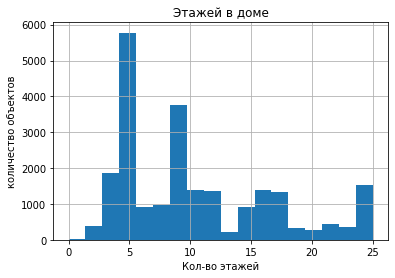

In [83]:
data['floors_total'].hist(bins = 18,  range=(0, 25)).set(title='Этажей в доме', 
    xlabel='Кол-во этажей', ylabel='количество объектов');

- Больше всего домов где до 10 этажей. То есть классические девятиэтажки. Можно предположить, что большинство квартир относятня ковторичному рынку. Так как в новых домах большое кол-во этажей

6. расстояние до центра города в метрах,
 расстояние до ближайшего аэропорта,
 расстояние до ближайшего парка

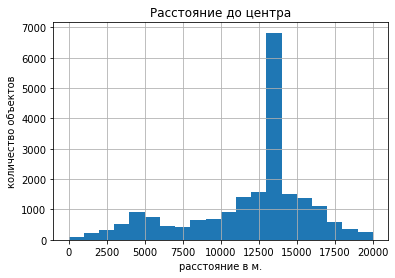

In [84]:
data['city_centers_nearest'].hist(bins = 20,  range=(0, 20000)).set(title='Расстояние до центра', 
    xlabel='расстояние в м.', ylabel='количество объектов');

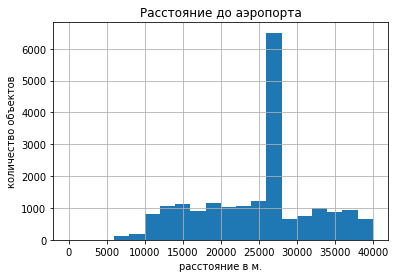

In [85]:
data['airports_nearest'].hist(bins = 20,  range=(0, 40000)).set(title='Расстояние до аэропорта', 
    xlabel='расстояние в м.', ylabel='количество объектов');

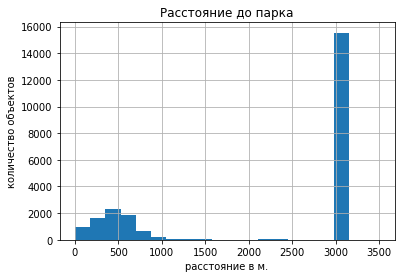

In [86]:
data['parks_nearest'].hist(bins = 20,  range=(0, 3500)).set(title='Расстояние до парка', 
    xlabel='расстояние в м.', ylabel='количество объектов');

- Расстояние до центра города в пике имеет значение 13 км
- Расстояние до аэропорта в пике 26-28 км
- Расстояние до парка в основном от 3 км. Но есть значение из ЛО до 1 км

7. Продажи дни и месяцы

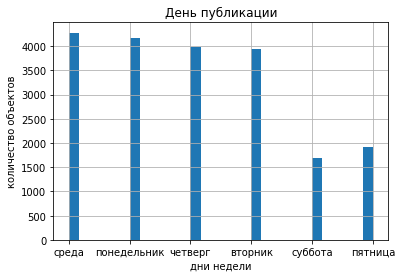

In [87]:
data['weekday_publication'].hist(bins=30).set(title='День публикации', 
    xlabel='дни недели', ylabel='количество объектов');
plt.show()

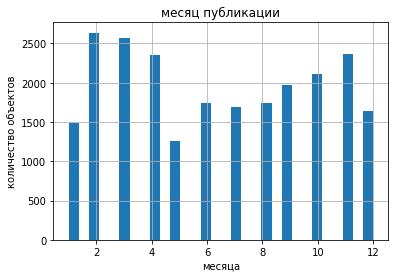

In [88]:
data['month_publication'].hist(bins=30).set(title='месяц публикации', 
    xlabel='месяца', ylabel='количество объектов');
plt.show()

- больше всего публикуется картир с понеднльника по четверг включительно
- больше всего публикуется картир зимой и в конце лета ближе к осени

### Как быстро продавались квартиры

In [89]:
data['days_exposition'].describe()

count    23565.000000
mean       185.759728
std        233.492930
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

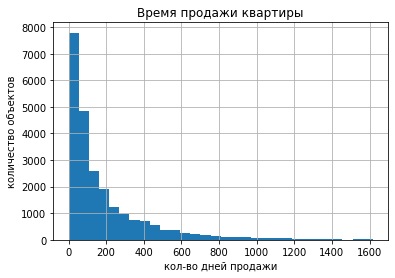

In [90]:
data['days_exposition'].hist(bins=30).set(title='Время продажи квартиры', 
    xlabel='кол-во дней продажи', ylabel='количество объектов');
plt.show()


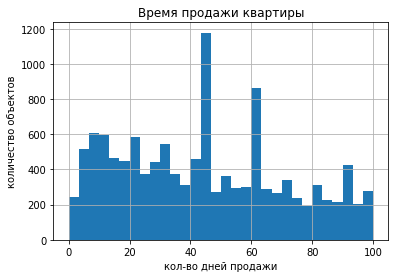

In [91]:
data['days_exposition'].hist(bins=30, range=(0, 100)).set(title='Время продажи квартиры', 
    xlabel='кол-во дней продажи', ylabel='количество объектов');
plt.show()

- Общее время продажи жилой недвижимости до 1600 дней. Медиана времени продажи находится на уровне 94 дней, а среднее значение 185 дней. При этом можно увидеть, что большинство квартир продается в первые 60 дней с момента публикации. Vожно сказать, что продажи прошли очень быстро, если сделки были оформлены в период до 16 дней и слишком долго, если до оформления сделки свыше 1134 дней.

Вывод: В основном это жилье общей площадью от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-35 кв.м., и с несколько меньшим, но ожидаемым ожидаемым пиком в диапазоне 40-50 кв.м. Размер площади кухни-в основном от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры, которые очень распространены в нашем городе и являются типичными для среднестатистической квартиры эконом-класса.

Цены на квартиры в основном находятся в диапазоне 2.5-15 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 763 млн.руб. Стоимость квадратного метра недвижимости варьируется от 50 до 140 тыс.руб. с пиком в области 90-100 тыс.руб.

Общее время продажи жилой недвижимости до 1600 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных -185 дней. При этом можно увидеть, что пик продаж приходится на 60 день с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 400 дней и слишком долго, если до оформления сделки свыше 1200 дней.

### Какие факторы влияют на цену

Для начала найду построю корреляционную матрицу для общей площади, жилой площади, кухни и комнат

In [92]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653687,0.556548,0.454382,0.363108
total_area,0.653687,1.000000,0.910618,0.585814,0.758657
living_area,0.556548,0.910618,1.000000,0.423906,0.852312
kitchen_area,0.454382,0.585814,0.423906,1.000000,0.274319
rooms,0.363108,0.758657,0.852312,0.274319,1.000000


Пока что корреляционые показатели не совсем понятны, буду визуализировать

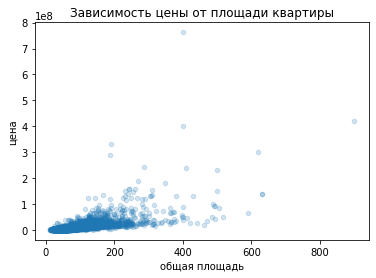

In [93]:
#диаграмма рессеяния (цена и общая площадь квартиры)
data.plot(x = 'total_area', y = 'last_price', kind='scatter', alpha=0.2,
                       title='Зависимость цены от площади квартиры').set(
                       xlabel='общая площадь', ylabel='цена');

Прослеживается корреляция в квартирах метражом до 200 кв. м. Корреляция равна 0,65

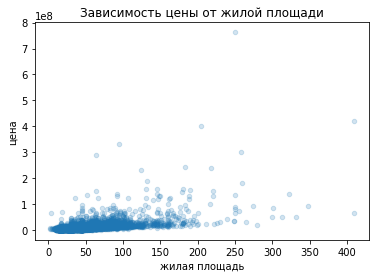

In [94]:
#диаграмма рассеяния (цена и жилая площадь)
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2,
                       title='Зависимость цены от жилой площади').set(
                       xlabel='жилая площадь', ylabel='цена');

Прослеживается корреляция где жилая площадь до 100 кв. м. Корреляция равна 0,55

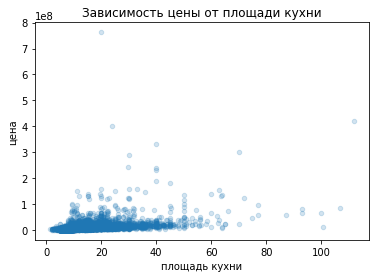

In [95]:
#диаграмма рассеяния (цена и площадь кухни)
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2,
                       title='Зависимость цены от площади кухни').set(
                       xlabel='площадь кухни', ylabel='цена');

Заметна корреляция с кухнями до 20 кв. м. Корреляция равна 0,45

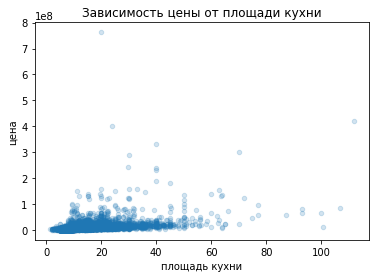

In [96]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2,
                       title='Зависимость цены от площади кухни').set(
                       xlabel='площадь кухни', ylabel='цена');

Присутствует зависимость с метражом до 20 кв.м. Корреляция равна 0,45

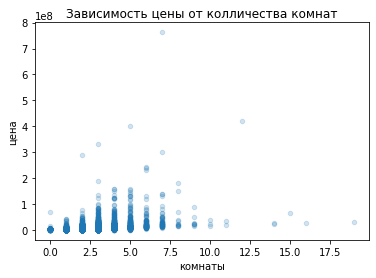

In [97]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2,
                       title='Зависимость цены от колличества комнат').set(
                       xlabel='комнаты', ylabel='цена');

Видно, что чем больше комнат, тем больше цена. Хотя корреляция приблизительно 0,35

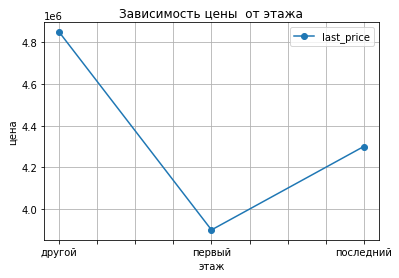

In [98]:
data.pivot_table(index='floor_group', values='last_price', aggfunc='median').reset_index().plot(
                      x='floor_group', y='last_price', grid=True, style='o-').set(
                      title='Зависимость цены  от этажа', 
                      xlabel='этаж', ylabel='цена');

На первом этаже квартиры дешевле, затем на последнем, а самые дорогие промежуточные

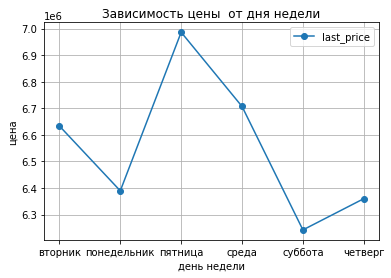

In [99]:
data.pivot_table(index='weekday_publication', values='last_price').reset_index().plot(
                      x='weekday_publication', y='last_price', grid=True, style='o-').set(
                      title='Зависимость цены  от дня недели', 
                      xlabel='день недели', ylabel='цена');

Больше сделок было закрыто в пятницу и среду. Меньше всего в субботу и понедельник

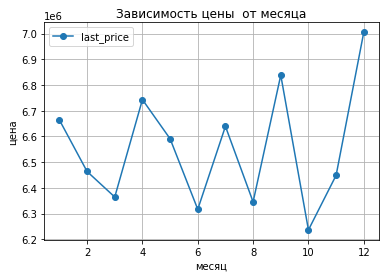

In [100]:
data.pivot_table(index='month_publication', values='last_price').reset_index().plot(
                      x='month_publication', y='last_price', grid=True, style='o-').set(
                      title='Зависимость цены  от месяца', 
                      xlabel='месяц', ylabel='цена');

Больше всего сделок закрыто перед новым годом, а за 2 месяца видна сильная просадка. Остальные значения меняются поочередно

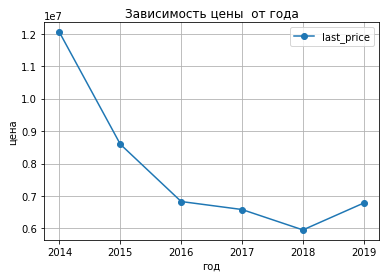

In [101]:
data.pivot_table(index='year_publication', values='last_price').reset_index().plot(
                      x='year_publication', y='last_price', grid=True, style='o-').set(
                      title='Зависимость цены  от года', 
                      xlabel='год', ylabel='цена');

Наблюдается падение продаж начиная с 2014 года, но в 2019 наблюдается небольшой прирост

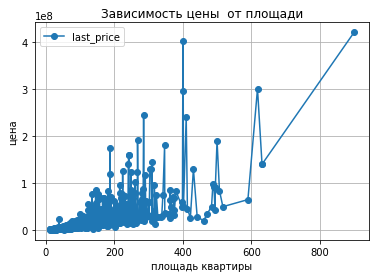

In [102]:
data.pivot_table(index='total_area', values='last_price').reset_index().plot(
                      x='total_area', y='last_price', grid=True, style='o-').set(
                      title='Зависимость цены  от площади', 
                      xlabel='площадь квартиры', ylabel='цена');

По данному графику можно сказать, что цена меняется вместе с увеличением площади квартир

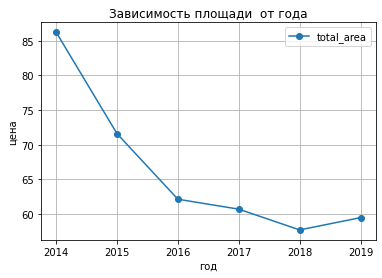

In [104]:
data.pivot_table(index='year_publication', values='total_area').reset_index().plot(
                      x='year_publication', y='total_area', grid=True, style='o-').set(
                      title='Зависимость площади  от года', 
                      xlabel='год', ylabel='цена');

Цена меняется в течение 5 лет. Так, в представленных данных наглядно видно как повлиял кризис рынка недвижимости на стоимость жилья. Ожидаемо, что цена увеличивается относительно площади квартир. Но на цену влияют и другие факторы которые были проанализированы выше.

Тем не менее, можно отметить сезонность продаж: пик спроса и рост цены  приходится на апрель и август и декабрь. Вероятнее всего влияние оказывает рост спроса на недвижимость после завершения года и после отпусков. В мае -июне спрос на жилье падает, возможно из-за массовых отпусков.

### Средняя цена в 10 населенных пунктах

In [105]:
top_10 = pd.pivot_table(data, index='locality_name', values='square_meter', aggfunc={'mean', 'count'})
top_10 = top_10.sort_values(by='count', ascending=False)
top_10.head(10)

,count,mean
locality_name,,
Санкт-Петербург,15651.0,114875.572296
Мурино,586.0,86040.658703
Кудрово,470.0,95260.393617
Шушары,439.0,78550.883827
Всеволожск,398.0,68654.007538
Пушкин,369.0,103125.373984
Колпино,338.0,75424.150888
Парголово,327.0,90175.489297
Гатчина,307.0,68745.693811


In [106]:
# Города с максимальной и минимальной стоимостью
top_10.query('mean == mean.min() or mean == mean.max()')

,count,mean
locality_name,,
Зеленогорск,24.0,115122.5
Старополье,3.0,11206.0


Город с максимальной средней стоимостью квадратного метра жилья - Зеленогорск (115 тыс.за кв.м.), с минимальной - Старополье (11 тыс.за кв.м.)

### Цена и расстояние до центра

In [107]:
spb_centr = data.query('locality_name == "Санкт-Петербург"') #срез где только спб
spb_centr_pivot = spb_centr.pivot_table(index='center_distance_km', # сводная таблица 
                  values='square_meter', aggfunc='mean').reset_index()
spb_centr_pivot

,center_distance_km,square_meter
0,0,245833.111111
1,1,177004.963542
2,2,157848.564516
3,3,121507.367816
4,4,133282.422965
5,5,140453.507104
6,6,151011.750809
7,7,156176.445238
8,8,125649.319865
9,9,113347.967851


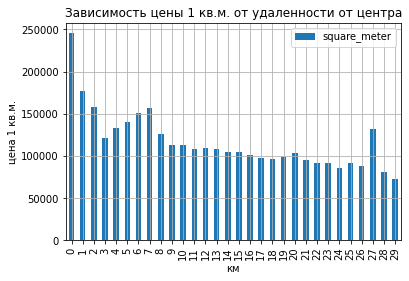

In [108]:
spb_centr_pivot.plot(x='center_distance_km', y='square_meter', kind= 'bar', 
                     grid=True,
                     title='Зависимость цены 1 кв.м. от удаленности от центра').set(
                     xlabel='км', ylabel='цена 1 кв.м.');


Видно, что чем ближе к центру города, тем выше цена

Вывод: Центральная зона Санкт-Петербурга находится в радиусе 8 км от центра. Средняя цена за 1 кв.м. зависит от удаленности от центра Санкт-Петербурга. В центре ее размер составляет в среднем 150 тыс.руб., и далее уменьшается до 75 тыс.руб.

### Общий вывод

Данные которые были предоставлены содержали нужную информацию для анализа гепотез. В процессе предварительной обработки данных были выявлены явные и неявные пропуски, ошибки представления значений (значения, не соответствующие действительности). Скорее всего, данные взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников клиентом. Указанные проблемы были устранены.

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа.

Исследование показало, что квартиры в основном продаются зимой и осенью. Чаще всего в рабочие дни. Это как обычные квартиры так и жилье бизнес-класса. Это помогает лучше понять ценообразование на рынке. И возможность узнать падение продаж с 2014 года.

Максимальная стоимость жилья - в Санкт-Петербурге, минимальная в Выборге. Предложения рынка недвижимости в центре Санкт-Петербурга характеризуется несколько большей площадью и ценой, чем прочие районы, но в целом предложений по квартирам с минимальной площадью также достаточно.